<a href="https://colab.research.google.com/github/rajtg19/MachineHack/blob/master/Preprocessing_in_Scikit_Learn_with_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kdnuggets.com/2020/06/simplifying-mixed-feature-type-preprocessing-scikit-learn-pipelines.html

Let's say we want to perform mixed feature type preprocessing in Python. For our purposes, let's say this includes:

    scaling of numeric values
    transforming of categorical values to one-hot encoded
    imputing all missing values 

Let's further say that we want this to be as painless, automated, and integrated into our machine learning workflow as possible.

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector

In [0]:
# Fetch Titanic dataset
titanic = fetch_openml('titanic', version=1, as_frame=True)

X = titanic.frame.drop('survived', axis=1)
y = titanic.frame['survived']

In [3]:
X.dtypes

pclass        float64
name           object
sex          category
age           float64
sibsp         float64
parch         float64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

Introduced in version 0.20, the ColumnTransformer is meant to apply Scikit-learn transformers to a single dataset column, be that column housed in a Numpy array or Pandas DataFrame.

This means that you are able to apply individual transformers to individual columns. This could mean that, specific to the Titanic dataset, perhaps we would like to scale numeric columns and one-hot encode categorical columns. It might also make sense to fill missing numeric values with its column's median value and fill in categorical missing values with a constant immediately prior to our feature scaling and encoding.

To do this, let's crate a pair of Pipeline objects, one each for the numeric and categorical transformations described. 

In [0]:
# Scale numeric values
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# One-hot encode categorical values
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Now let's add these transformers to a ColumnTransfer object. We could either specify which columns to apply these transformations to specifically, or we could use a column selector to automate this process. Note the line

from sklearn.compose import make_column_selector as selector

from the imports above. In the code below, we are creating a num_transformer and a cat_transformer and directing them to be applied to all columns of type float64 all columns of type category, respectively.

In [0]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, selector(dtype_include='float64')),
        ('cat', cat_transformer, selector(dtype_include='category'))])

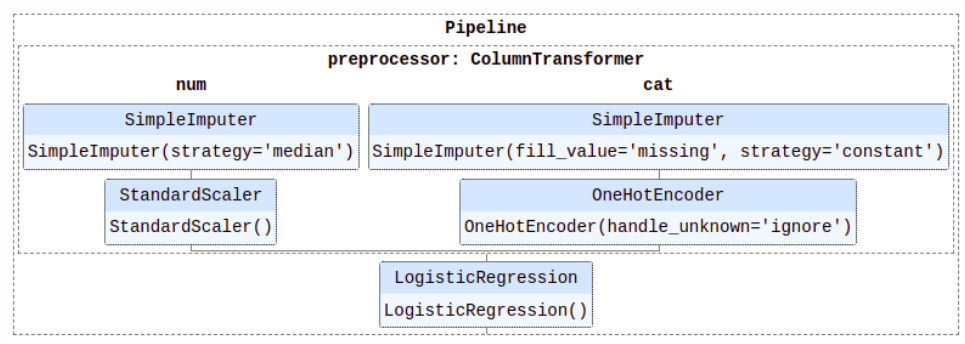

In [6]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])

NameError: ignored